# Tutorial of Pathifier using data GSE10245

#### Contributor: Antonio Mora, Chengshu Xie 
#### Date of first version: 2018-11-20
#### Date of last review: 2020-05-26 
#### Summary:

This is the tutorial about using how to use R package `athifier`. We use the example data, [part of GSE10245](https://github.com/mora-lab/benchmarks/blob/master/single-sample/workflows/data/GSE10245.RDS), for this tutorial, which is available in Github. The dataset is [a microarray dataset about non-small cell lung cancer(NSCLC) in GEO database](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE10245).
 . 

#### Contents:
* [1. Data Preparation](#link1)    <br>
    * [1.1 Prerequisites](#link2)     <br>
    * [1.2 Import data](#link3)   <br>
* [2. Method application](#link4)  <br>
    * [2.1 Quantify deregulation of pathways](#link5)     <br>
    * [2.2 Transform into deregulation scores matrix](#link6)   <br>
* [3. Brief analysis](#link7)
        
    
## <a id=link1>1. Data Preparation</a>

### <a id=link2>1.1 Prerequisites</a>

R package, `pathifier`, needs to be installed and loaded in the R session, this can be done easily with the following chunk of code: 

In [1]:
install.packages("BiocManager")
BiocManager::install("pathifier")

suppressPackageStartupMessages(library(pathifier))

### <a id=link3>1.2 Import data</a>

The main functions in `pathifier`, require the expression data, disease status and the reference pathways(gene sets). <br>
All the data could be obtained from [GitHub](https://github.com/mora-lab/benchmarks/blob/master/single-sample/workflows/data). About the reference pathway, you could download the `.GMT` file from [GSEA|MSigDB](http://software.broadinstitute.org/gsea/msigdb/download_file.jsp?filePath=/resources/msigdb/7.0/c2.cp.kegg.v7.0.symbols.gmt), which contains KEGG pathway information and could be read into R via [read_gmt()](https://github.com/mora-lab/benchmarks/blob/master/single-sample/R/read_gmt.R). What users need to do is to download them before loading the example data into R session. <br>

Then use the following R codes to load the input data: 

In [2]:
### Not run, to run it, download the example .RDS file and change the address in "readRDS()"
GSE10245 = readRDS("git@github.com:mora-lab/benchmarks/tree/master/single-sample/workflows/data/GSE10245.RDS")

## make the "GSE10245" object into the input data of `pathifier` 
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/format_input_pathifier.R")
new_GSE10245 = format_input_pathifier(GSE10245)

The reference pathways are loaded via:

In [3]:
source("git@github.com:mora-lab/benchmarks/tree/master/single-sample/R/read_gmt.R")
pathwaylist = read_gmt("git@github.com:mora-lab/benchmarks/tree/master/single-sample/data/example_pathway.gmt")

## make the "pathwaylist" object into the input pathway data of `pathifier` 
PATHWAYS = list();
PATHWAYS$gs = pathwaylist;
PATHWAYS$pathwaynames = as.list(names(pathwaylist));
names(PATHWAYS$pathwaynames) = names(pathwaylist);

## <a id=link4>2. Method application</a>

### <a id=link5>2.1 Quantify deregulation of pathways</a>

Calculate the deregulation score by running `quantify_pathways_deregulation()`.

INPUT: a list of data, where contains n(genes) X m(samples) mRNA expression data matrix, allgenes, a list of samples' disease status(1 = normal sample, 0 = tumor/disease sample), min_exp and min_std and pathways users are interested in.<br>
OUTPUT: a list of pathway scores.<br>

In [4]:
result_GSE10245 = quantify_pathways_deregulation(new_GSE10245$data,
                                                 new_GSE10245$allgenes,
                                                 PATHWAYS$gs,
                                                 PATHWAYS$pathwaynames,
                                                 new_GSE10245$normals,
                                                 # maximize_stability = T,
                                                 attempts = 100,
                                                 min_std = new_GSE10245$min_std,
                                                 min_exp = new_GSE10245$min_exp)


robust_score_bydist. min_exp= 2.218097 , min_std= 0.1414094 
pathway  1 > sig: 0.0788286 
pathway  1  k= 43 ( 43 ) wj= 1 >new sig: 0.04194522 | accepted!
pathway  2 > sig: 0.09189035 
pathway  2  k= 21 ( 21 ) wj= 4 >new sig: 0.07858794 | accepted!
pathway  2  k= 20 ( 20 ) wj= 4 >new sig: 0.06655103 | accepted!
pathway  2  k= 19 ( 19 ) wj= 1 >new sig: 0.05672108 | accepted!
pathway  2  k= 18 ( 18 ) wj= 4 >new sig: 0.05203705 x rejected
pathway  3 > sig: 0.0456661 
pathway  4 > sig: 0.06728287 
pathway  4  k= 17 ( 17 ) wj= 5 >new sig: 0.04301142 | accepted!
pathway  5 > sig: 0.08601427 
pathway  5  k= 43 ( 43 ) wj= 2 >new sig: 0.06032708 | accepted!
pathway  5  k= 42 ( 42 ) wj= 1 >new sig: 0.02867799 | accepted!
pathway  6 > sig: 0.0347047 
pathway  7 > sig: 0.02425108 
pathway  8 > sig: 0.05234824 
pathway  8  k= 17 ( 17 ) wj= 3 >new sig: 0.05262162 x rejected
8 pathways processed with start= by ranks 


In [5]:
result_GSE10245

0.1416274,0.2728802,0.5902723,0.1820765,0.7102424,0.3225745,0.3867141,0.1717621,0.2770867,0.2991498,...,0.500953,0.2666785,0.2930644,0.2553752,0.5444047,0.3833819,0.3706633,0.1349957,0.3229482,0.2277505
0.3260568,0.4364781,0.5733219,0.2938441,0.7116548,0.2722479,0.4863114,0.2722479,0.3477306,0.1771175,...,0.5533678,0.4207058,0.3164037,0.3120913,0.5745462,0.3484288,0.343168,0.2874343,0.3655467,0.4231581
0.2115948,0.2991404,0.6518485,0.06192174,0.7117404,0.4928702,0.3320039,0,0.3828354,0.4525015,...,0.6333649,0.3427429,0.4408592,0.3566247,0.5245609,0.4096374,0.5684286,0.331746,0.4395236,0.2038507
0.3139185,0.416011,0.7997155,0.2491138,0.6836659,0.4673694,0.6230372,0.1865034,0.3855415,0.4747851,...,0.6417879,0.4453396,0.4489489,0.3397621,0.6351353,0.6285877,0.5586683,0.3449043,0.4732314,0.3117906
0.3215843,0.4400084,0.7659728,0.3150527,1,0.3664074,0.5160052,0.2532408,0.3465028,0.3664074,...,0.6443694,0.4400084,0.4538522,0.322645,0.7841423,0.5795208,0.59297,0.2552206,0.3720652,0.3621274
0.04906859,0,0.8340338,0.08078832,0.414894,0.1259313,0.2708908,0.03781597,0.036786,0.07833909,...,0.3165214,0.06289291,0.1239543,0.07945173,0.3476249,0.1259313,0.1259313,0.06613191,0.1259313,0.02894184
0.04231734,0.02860439,0.8858557,0.02336673,0.3148807,0.03755964,0.1362861,0.007320795,0.001807667,0,...,0.1733878,0.03666662,0.03358343,0.0154096,0.1799747,0.04168844,0.05006855,0.01322006,0.04433902,0.01220114
0.4053088,0.4297965,0.6633296,0.3529085,0.8010267,0.4937161,0.4961268,0.4270812,0.4865789,0.3464927,...,0.5901282,0.3307385,0.210694,0.489742,0.5556526,0.5623569,0.5715593,0.474335,0.3502273,0.4538823
PC1,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,...,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43
-6.3176330,-2.80764110,1.09280571,0.12291225,-0.96506904,-0.49127849,-0.5908262521,0.37069763,-0.654708492,0.53337881,...,0.052082239,0.021419597,-0.0498920970,0.019054776,-0.0341350616,0.111189868,-0.11333393,0.0077607301,-0.08883248,-6.214193e-03
-3.1719297,1.97316405,-0.26826027,0.20423692,0.46021913,-0.11209615,0.3626470890,-0.77242306,0.469764628,-0.20957955,...,0.014714452,0.069163398,-0.0013684195,0.040906298,0.0216902880,-0.105926349,-0.02255452,0.0300560592,-0.02348590,1.128447e-02


### <a id=link6>2.2 Transform into deregulation scores matrix</a>

The deregulation scores are now in `result_GSE10245$scores`, ready for further analysis.

In [6]:
result.PDS = t(mapply(FUN = c, result_GSE10245$scores));
colnames(result.PDS) = colnames(GSE10245)

In [7]:
result.PDS

,GSM258551,GSM258552,GSM258553,GSM258554,GSM258555,GSM258556,GSM258557,GSM258558,GSM258559,GSM258560,...,GSM258599,GSM258600,GSM258601,GSM258602,GSM258603,GSM258604,GSM258605,GSM258606,GSM258607,GSM258608
KEGG_MAPK_signaling_pathway,0.14162741,0.27288020,0.5902723,0.18207655,0.7102424,0.32257451,0.3867141,0.171762077,0.277086650,0.29914975,...,0.5009530,0.26667850,0.29306440,0.25537524,0.5444047,0.38338193,0.37066333,0.13499574,0.32294820,0.22775054
KEGG_Erbb_signaling_pathway,0.32605677,0.43647806,0.5733219,0.29384414,0.7116548,0.27224792,0.4863114,0.272247916,0.347730577,0.17711754,...,0.5533678,0.42070583,0.31640372,0.31209132,0.5745462,0.34842878,0.34316796,0.28743434,0.36554666,0.42315811
KEGG_cell_cycle,0.21159484,0.29914044,0.6518485,0.06192174,0.7117404,0.49287016,0.3320039,0.000000000,0.382835353,0.45250153,...,0.6333649,0.34274293,0.44085922,0.35662469,0.5245609,0.40963739,0.56842862,0.33174597,0.43952356,0.20385066
KEGG_P53_signaling_pathway,0.31391847,0.41601103,0.7997155,0.24911378,0.6836659,0.46736944,0.6230372,0.186503382,0.385541483,0.47478508,...,0.6417879,0.44533955,0.44894893,0.33976213,0.6351353,0.62858766,0.55866833,0.34490435,0.47323139,0.31179063
KEGG_PI3K-AKT_signaling_pathway,0.32158429,0.44000836,0.7659728,0.31505273,1.0000000,0.36640740,0.5160052,0.253240813,0.346502808,0.36640740,...,0.6443694,0.44000836,0.45385219,0.32264498,0.7841423,0.57952077,0.59297000,0.25522058,0.37206517,0.36212735
KEGG_RAS_signaling_pathway,0.04906859,0.00000000,0.8340338,0.08078832,0.4148940,0.12593134,0.2708908,0.037815972,0.036785997,0.07833909,...,0.3165214,0.06289291,0.12395434,0.07945173,0.3476249,0.12593134,0.12593134,0.06613191,0.12593134,0.02894184
KEGG_calcium_signaling_pathway,0.04231734,0.02860439,0.8858557,0.02336673,0.3148807,0.03755964,0.1362861,0.007320795,0.001807667,0.00000000,...,0.1733878,0.03666662,0.03358343,0.01540960,0.1799747,0.04168844,0.05006855,0.01322006,0.04433902,0.01220114
KEGG_NON_small_cell_lung_cancer,0.40530876,0.42979654,0.6633296,0.35290847,0.8010267,0.49371610,0.4961268,0.427081187,0.486578929,0.34649273,...,0.5901282,0.33073854,0.21069404,0.48974201,0.5556526,0.56235690,0.57155926,0.47433505,0.35022725,0.45388234


## <a id=link7>3. Brief analysis</a>

Show scores for normals samples are genereally lower.

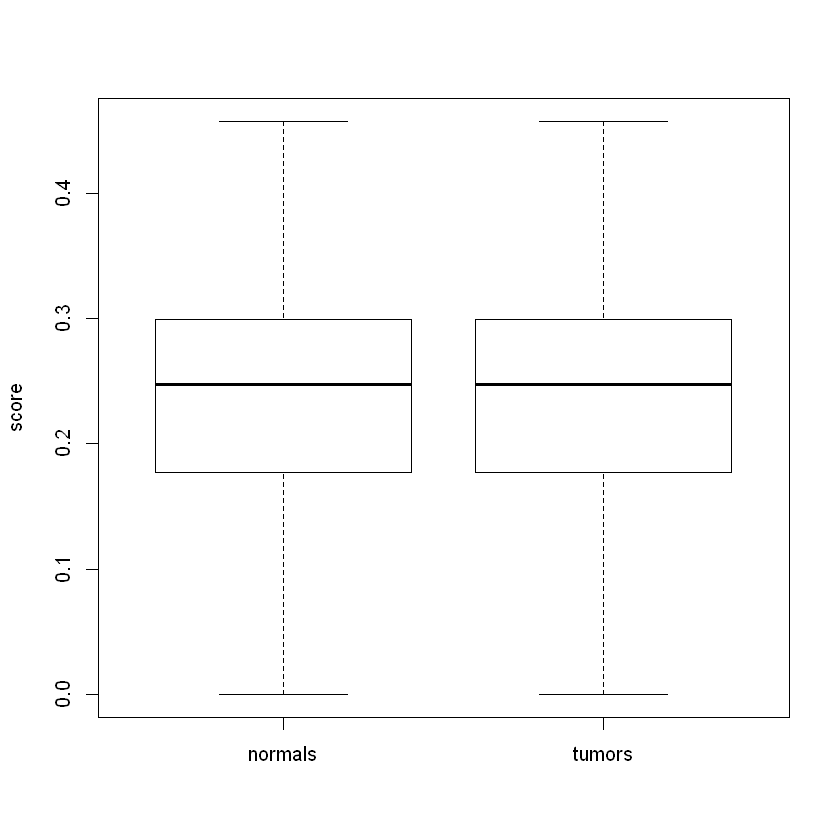

In [8]:
x = NULL
x$normals = result_GSE10245$scores$KEGG_MAPK_signaling_pathway[new_GSE10245$normals]
x$tumors = result_GSE10245$scores$KEGG_MAPK_signaling_pathway[new_GSE10245$normals]
boxplot(x,ylab="score")

In [9]:
# List samples whose regulation of autophagy is highly deregulated
as.character(new_GSE10245$samples[result_GSE10245$scores$KEGG_MAPK_signaling_pathway>0.6])

[1] "GSM258555" "GSM258565" "GSM258566" "GSM258578" "GSM258594"

In [10]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18363)

Matrix products: default

locale:
[1] LC_COLLATE=Chinese (Simplified)_China.936 
[2] LC_CTYPE=Chinese (Simplified)_China.936   
[3] LC_MONETARY=Chinese (Simplified)_China.936
[4] LC_NUMERIC=C                              
[5] LC_TIME=Chinese (Simplified)_China.936    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] pathifier_1.24.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6      digest_0.6.25     crayon_1.3.4      R.methodsS3_1.8.0
 [5] IRdisplay_0.7.0   repr_1.1.0        jsonlite_1.6.1    princurve_2.1.4  
 [9] evaluate_0.14     pillar_1.4.4      rlang_0.4.5       uuid_0.1-4       
[13] R.oo_1.23.0       vctrs_0.2.4       IRkernel_1.1      tools_3.6.3      
[17] compiler_3.6.3    base64enc_0.1-3   htmltools_0.4.0   pbdZMQ_0.3-3     